In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import nltk

## Analysis Data

In [2]:
headers_name = ['label', 'body_text']
SMS_SH_df = pd.read_csv("SMSSpamCollection.csv", sep="\t", header=None, names=headers_name)
SMS_SH_df.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [3]:
SMS_SH_df.shape

(5568, 2)

In [4]:
SMS_SH_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5568 non-null   object
 1   body_text  5568 non-null   object
dtypes: object(2)
memory usage: 87.1+ KB


In [5]:
SMS_SH_df.describe()

,label,body_text
count,5568,5568
unique,2,5165
top,ham,"Sorry, I'll call later"
freq,4822,30


In [6]:
SMS_SH_df.label.value_counts()

ham     4822
spam     746
Name: label, dtype: int64

In [7]:
SMS_SH_df.label.value_counts(normalize=True)

ham     0.86602
spam    0.13398
Name: label, dtype: float64

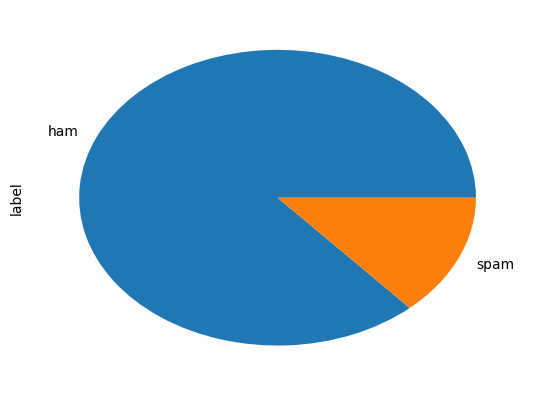

In [8]:
SMS_SH_df.label.value_counts(normalize=True).plot.pie()
plt.show()

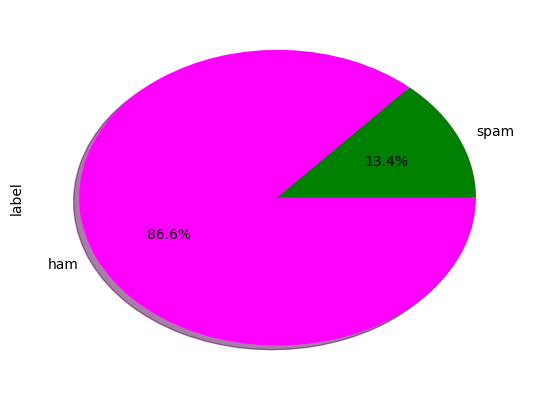

In [9]:
colors = ["magenta", "green", "purple", "orange"]

SMS_SH_df.label.value_counts(normalize=True).plot.pie(autopct='%1.1f%%', shadow=True, startangle=0, counterclock=False, colors=colors)
plt.show()

In [10]:
SMS_SH_df.isnull().value_counts()

label  body_text
False  False        5568
dtype: int64

In [11]:
df = SMS_SH_df.copy()

In [12]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
# %%time
# punct = string.punctuation
# text='Hello!!!, I love NLP, will use python in our code.'

# no_punct = ""
# for char in text:
#   if char not in punct:
#     no_punct = no_punct + char
# print(no_punct)

In [14]:
# %time
# text='Hello!!!, I love NLP, will use python in our code.'
# text_nopunct = ''.join(char for char in text if char not in string.punctuation)
# print(text_nopunct)

In [15]:
# %time
# text='Hello!!!, I love NLP, will use python in our code.'
# text_nopunct = ''.join([char for char in text if char not in string.punctuation])
# print(text_nopunct)

In [16]:
def remove_punct(text):
  text_nopunct = ''.join([char for char in text if char not in string.punctuation])
  return text_nopunct

In [17]:
pd.set_option('display.max_colwidth', 200)

In [18]:
df['body_text_nopunc'] = df['body_text'].apply(lambda x: remove_punct(x.lower()))
df.head()

,label,body_text,body_text_nopunc
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive been searching for the right words to thank you for this breather i promise i wont take your help for granted and will fulfil my promise you have been wonderful and a blessing at all times
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even my brother is not like to speak with me they treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will


## Tokenization

In [19]:
import re

In [20]:
%time
text = 'I love NLP, will use python in our code.'
tokens = re.split('\W+', text)
tokens

Wall time: 0 ns


['I', 'love', 'NLP', 'will', 'use', 'python', 'in', 'our', 'code', '']

In [21]:
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [22]:
df['body_text_tokenized'] = df['body_text_nopunc'].apply(lambda x: tokenize(x))
df.head()

,label,body_text,body_text_nopunc,body_text_tokenized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive been searching for the right words to thank you for this breather i promise i wont take your help for granted and will fulfil my promise you have been wonderful and a blessing at all times,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, i, wont, take, your, help, for, granted, and, will, fulfil, my, promise, you, have, been, wonderful,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even my brother is not like to speak with me they treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]"


In [23]:
import nltk
from nltk.corpus import stopwords

In [24]:
stopwords_En = nltk.corpus.stopwords.words('english')
stopwords_En

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords_En]
    return text

In [26]:
df['body_text_nostop'] = df['body_text_tokenized'].apply(lambda x: remove_stopwords(x))
df.head()

,label,body_text,body_text_nopunc,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive been searching for the right words to thank you for this breather i promise i wont take your help for granted and will fulfil my promise you have been wonderful and a blessing at all times,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, i, wont, take, your, help, for, granted, and, will, fulfil, my, promise, you, have, been, wonderful,...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, promise, wonderful, blessing, times]"
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even my brother is not like to speak with me they treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


Stopwords in arabic

In [27]:
stopwords_Ar = nltk.corpus.stopwords.words('arabic')
stopwords_Ar

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [28]:
text_Ar = "إن يوماً باقياً من العمر ... هو للمؤمن عمر ما ينبغى أن يستهان به"

In [29]:
text_ar_nopunct = "".join([char for char in text_Ar if char not in string.punctuation])
text_ar_nopunct

'إن يوماً باقياً من العمر  هو للمؤمن عمر ما ينبغى أن يستهان به'

In [30]:
text_Ar_tokens = nltk.word_tokenize(text_ar_nopunct)
text_Ar_tokens

['إن',
 'يوماً',
 'باقياً',
 'من',
 'العمر',
 'هو',
 'للمؤمن',
 'عمر',
 'ما',
 'ينبغى',
 'أن',
 'يستهان',
 'به']

In [31]:
text_Ar_nostop = [word for word in text_Ar_tokens if word not in stopwords_Ar]
text_Ar_nostop

['يوماً', 'باقياً', 'العمر', 'للمؤمن', 'عمر', 'ينبغى', 'يستهان']

## Stemming & Lemmatization

### Stemming

In [32]:
import nltk
ps = nltk.PorterStemmer()

In [33]:
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'vowels']

In [34]:
print(ps.stem('better'))

better


In [35]:
print(ps.stem('play'))
print(ps.stem('playing'))
print(ps.stem('played'))
print(ps.stem('plays'))

play
play
play
play


In [36]:
# Over stemming

print(ps.stem('universal'))
print(ps.stem('university'))
print(ps.stem('universe'))

univers
univers
univers


In [37]:
# Under stemming

print(ps.stem('alumuns'))
print(ps.stem('alumni'))
print(ps.stem('alumnae'))

alumun
alumni
alumna


In [38]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

In [39]:
df['body_text_stemmed'] = df['body_text_nostop'].apply(lambda x: stemming(x))
df.head()

,label,body_text,body_text_nopunc,body_text_tokenized,body_text_nostop,body_text_stemmed
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive been searching for the right words to thank you for this breather i promise i wont take your help for granted and will fulfil my promise you have been wonderful and a blessing at all times,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, i, wont, take, your, help, for, granted, and, will, fulfil, my, promise, you, have, been, wonderful,...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, promise, wonderful, blessing, times]","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, wonder, bless, time]"
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]"
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even my brother is not like to speak with me they treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


### Lemmatization

In [40]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [42]:
import nltk

wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()            

In [43]:
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'lemmatize']

In [44]:
print(wn.lemmatize('better'))

better


In [45]:
print(wn.lemmatize('universal'))
print(wn.lemmatize('university'))
print(wn.lemmatize('universe'))

universal
university
universe


In [46]:
print(wn.lemmatize('alumuns'))
print(wn.lemmatize('alumni'))
print(wn.lemmatize('alumnae'))

alumuns
alumnus
alumna


In [47]:
def lemmatization(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

In [48]:
df['body_text_lemmatized'] = df['body_text_nostop'].apply(lambda x: lemmatization(x))
df.head()

,label,body_text,body_text_nopunc,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive been searching for the right words to thank you for this breather i promise i wont take your help for granted and will fulfil my promise you have been wonderful and a blessing at all times,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, i, wont, take, your, help, for, granted, and, will, fulfil, my, promise, you, have, been, wonderful,...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, promise, wonderful, blessing, times]","[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, wonder, bless, time]","[ive, searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promise, wonderful, blessing, time]"
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to, 87121, to, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 08452810075over18]","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receive, entry, questionstd, txt, ratetcs, apply, 08452810075over18s]"
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even my brother is not like to speak with me they treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"


In [49]:
import nltk
import string

ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords_En])
    return text

In [50]:
df = df[['label', 'body_text']]

In [51]:
df['cleaned_text'] = df['body_text'].apply(lambda x: clean_text(x))

In [52]:
df.shape

(5568, 3)

In [53]:
df.head()

,label,body_text,cleaned_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive search right word thank breather promis wont take help grant fulfil promis wonder bless time
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday


## Vectorization

In [54]:
sentences = ["good movie", "not a good movie", "did not like", "i like it"]

#### count vectoriation

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
features_cv = vectorizer.fit_transform(sentences)
print(features_cv.shape)
print('Sparse Matrix:\n', features_cv)

(4, 6)
Sparse Matrix:
   (0, 1)	1
  (0, 4)	1
  (1, 1)	1
  (1, 4)	1
  (1, 5)	1
  (2, 5)	1
  (2, 0)	1
  (2, 3)	1
  (3, 3)	1
  (3, 2)	1


In [56]:
features_cv = pd.DataFrame(features_cv.toarray())
features_cv.columns = vectorizer.get_feature_names()
features_cv

c:\Users\Ahmed\AppData\Local\anaconda3\envs\nlp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,did,good,it,like,movie,not
0,0,1,0,0,1,0
1,0,1,0,0,1,1
2,1,0,0,1,0,1
3,0,0,1,1,0,0


#### N-Grams

In [57]:
sentences = ["good movie", "not a good movie", "did not like", "i like it"]

ngram_vect = CountVectorizer(ngram_range=(1, 1))
features_ng = ngram_vect.fit_transform(sentences)
print(features_ng.shape)
print('Sparse Matrix:\n', features_ng)

features_ng = pd.DataFrame(features_ng.toarray())
features_ng.columns = ngram_vect.get_feature_names()
features_ng

(4, 6)
Sparse Matrix:
   (0, 1)	1
  (0, 4)	1
  (1, 1)	1
  (1, 4)	1
  (1, 5)	1
  (2, 5)	1
  (2, 0)	1
  (2, 3)	1
  (3, 3)	1
  (3, 2)	1


c:\Users\Ahmed\AppData\Local\anaconda3\envs\nlp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,did,good,it,like,movie,not
0,0,1,0,0,1,0
1,0,1,0,0,1,1
2,1,0,0,1,0,1
3,0,0,1,1,0,0


In [58]:
sentences = ["good movie", "not a good movie", "did not like", "i like it"]

ngram_vect = CountVectorizer(ngram_range=(1, 3))
features_ng = ngram_vect.fit_transform(sentences)
print(features_ng.shape)
print('Sparse Matrix:\n', features_ng)

features_ng = pd.DataFrame(features_ng.toarray())
features_ng.columns = ngram_vect.get_feature_names()
features_ng

(4, 13)
Sparse Matrix:
   (0, 3)	1
  (0, 8)	1
  (0, 4)	1
  (1, 3)	1
  (1, 8)	1
  (1, 4)	1
  (1, 9)	1
  (1, 10)	1
  (1, 11)	1
  (2, 9)	1
  (2, 0)	1
  (2, 6)	1
  (2, 1)	1
  (2, 12)	1
  (2, 2)	1
  (3, 6)	1
  (3, 5)	1
  (3, 7)	1


c:\Users\Ahmed\AppData\Local\anaconda3\envs\nlp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,did,did not,did not like,good,good movie,it,like,like it,movie,not,not good,not good movie,not like
0,0,0,0,1,1,0,0,0,1,0,0,0,0
1,0,0,0,1,1,0,0,0,1,1,1,1,0
2,1,1,1,0,0,0,1,0,0,1,0,0,1
3,0,0,0,0,0,1,1,1,0,0,0,0,0


#### TF-IDF

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

sentences = ["good movie", "not a good movie", "did not like", "i like it"]

tfidf_vect = TfidfVectorizer(ngram_range=(1,3))
features_tfidf = tfidf_vect.fit_transform(sentences)
print(features_tfidf.shape)
print('Sparse Matrix:\n', features_tfidf)

features_tfidf = pd.DataFrame(features_tfidf.toarray())
features_tfidf.columns = tfidf_vect.get_feature_names()
features_tfidf

(4, 13)
Sparse Matrix:
   (0, 4)	0.5773502691896257
  (0, 8)	0.5773502691896257
  (0, 3)	0.5773502691896257
  (1, 11)	0.47212002654617047
  (1, 10)	0.47212002654617047
  (1, 9)	0.3722248517590162
  (1, 4)	0.3722248517590162
  (1, 8)	0.3722248517590162
  (1, 3)	0.3722248517590162
  (2, 2)	0.43671930987511215
  (2, 12)	0.43671930987511215
  (2, 1)	0.43671930987511215
  (2, 6)	0.3443145201184689
  (2, 0)	0.43671930987511215
  (2, 9)	0.3443145201184689
  (3, 7)	0.6176143709756019
  (3, 5)	0.6176143709756019
  (3, 6)	0.48693426407352264


c:\Users\Ahmed\AppData\Local\anaconda3\envs\nlp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,did,did not,did not like,good,good movie,it,like,like it,movie,not,not good,not good movie,not like
0,0.000000,0.000000,0.000000,0.577350,0.577350,0.000000,0.000000,0.000000,0.577350,0.000000,0.00000,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.372225,0.372225,0.000000,0.000000,0.000000,0.372225,0.372225,0.47212,0.47212,0.000000
2,0.436719,0.436719,0.436719,0.000000,0.000000,0.000000,0.344315,0.000000,0.000000,0.344315,0.00000,0.00000,0.436719
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.617614,0.486934,0.617614,0.000000,0.000000,0.00000,0.00000,0.000000


### Apply on Data

#### Count Vectorization

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
features_CountVec = vectorizer.fit_transform(df['cleaned_text'])
print(features_CountVec.shape)
print(f'Sparse Matrix:\n{features_CountVec}')
features_CountVec = pd.DataFrame(features_CountVec.toarray(), columns=vectorizer.get_feature_names())
features_CountVec

(5568, 8090)
Sparse Matrix:
  (0, 3983)	1
  (0, 6219)	1
  (0, 6032)	1
  (0, 7835)	1
  (0, 7032)	1
  (0, 1681)	1
  (0, 5746)	2
  (0, 7826)	1
  (0, 6925)	1
  (0, 3571)	1
  (0, 3391)	1
  (0, 3187)	1
  (0, 7825)	1
  (0, 1568)	1
  (0, 7136)	1
  (1, 3127)	1
  (1, 2783)	2
  (1, 7805)	1
  (1, 2110)	1
  (1, 7771)	1
  (1, 2901)	2
  (1, 2279)	1
  (1, 3003)	1
  (1, 7158)	1
  (1, 452)	1
  :	:
  (5564, 3661)	1
  (5564, 3313)	1
  (5564, 3116)	1
  (5564, 2811)	1
  (5565, 6820)	1
  (5565, 4824)	1
  (5565, 5518)	1
  (5565, 6518)	1
  (5566, 3127)	1
  (5566, 4360)	1
  (5566, 7681)	1
  (5566, 5005)	1
  (5566, 7462)	1
  (5566, 6540)	1
  (5566, 1765)	1
  (5566, 2741)	1
  (5566, 3232)	1
  (5566, 3454)	1
  (5566, 3793)	1
  (5566, 3908)	1
  (5566, 986)	1
  (5566, 1552)	1
  (5567, 4927)	1
  (5567, 7296)	1
  (5567, 6060)	1


c:\Users\Ahmed\AppData\Local\anaconda3\envs\nlp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### N-gram

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range=(1, 3))
features_ngram = ngram_vect.fit_transform(df['cleaned_text'])
print(features_ngram.shape)
print(f'Sparse Matrix:\n{features_ngram}')
features_ngram = pd.DataFrame(features_ngram.toarray(), columns=ngram_vect.get_feature_names())
features_ngram

(5568, 71114)
Sparse Matrix:
  (0, 32012)	1
  (0, 52679)	1
  (0, 51097)	1
  (0, 68874)	1
  (0, 60069)	1
  (0, 9211)	1
  (0, 48951)	2
  (0, 68761)	1
  (0, 58737)	1
  (0, 28173)	1
  (0, 26314)	1
  (0, 23047)	1
  (0, 68699)	1
  (0, 8482)	1
  (0, 61547)	1
  (0, 32090)	1
  (0, 52702)	1
  (0, 51188)	1
  (0, 68924)	1
  (0, 60080)	1
  (0, 9212)	1
  (0, 48973)	1
  (0, 68833)	1
  (0, 58823)	1
  (0, 28203)	1
  :	:
  (5566, 30234)	1
  (5566, 31689)	1
  (5566, 9814)	1
  (5566, 19004)	1
  (5566, 67204)	1
  (5566, 23403)	1
  (5566, 64906)	1
  (5566, 26815)	1
  (5566, 8404)	1
  (5566, 3613)	1
  (5566, 35441)	1
  (5566, 30235)	1
  (5566, 31690)	1
  (5566, 9815)	1
  (5566, 55820)	1
  (5566, 19005)	1
  (5566, 42869)	1
  (5566, 67205)	1
  (5566, 23404)	1
  (5567, 41870)	1
  (5567, 63280)	1
  (5567, 51387)	1
  (5567, 51390)	1
  (5567, 63304)	1
  (5567, 51391)	1


c:\Users\Ahmed\AppData\Local\anaconda3\envs\nlp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,008704050406,008704050406 sp,008704050406 sp arrow,0089mi,0089mi last,0089mi last four,0121,0121 2025050,0121 2025050 visit,01223585236,...,zyada kisi ko,üll,üll finish,üll finish buy,üll submit,üll submit da,üll take,üll take forev,〨ud,〨ud even
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(ngram_range=(1, 1))
features_tfidf = tfidf_vect.fit_transform(df['cleaned_text'])
print(features_tfidf.shape)
print(f'Sparse Matrix:\n{features_tfidf}')
features_tfidf = pd.DataFrame(features_tfidf.toarray(), columns=tfidf_vect.get_feature_names())
features_tfidf

(5568, 8090)
Sparse Matrix:
  (0, 7136)	0.14980274830529214
  (0, 1568)	0.26089434037596076
  (0, 7825)	0.21150110049571239
  (0, 3187)	0.31823811606369057
  (0, 3391)	0.31823811606369057
  (0, 3571)	0.20015469242175096
  (0, 6925)	0.16255603874008892
  (0, 7826)	0.19951269863634857
  (0, 5746)	0.5087965592478143
  (0, 1681)	0.31823811606369057
  (0, 7032)	0.17885394474810676
  (0, 7835)	0.20080846656471296
  (0, 6032)	0.18300600862568117
  (0, 6219)	0.23121804559946996
  (0, 3983)	0.19105676866553414
  (1, 71)	0.23441859993383393
  (1, 1217)	0.16767154223015557
  (1, 5864)	0.23441859993383393
  (1, 7340)	0.12407725477387192
  (1, 5818)	0.23441859993383393
  (1, 5906)	0.16121500299571126
  (1, 869)	0.220374265813368
  (1, 7017)	0.11827553689542254
  (1, 439)	0.22650924112721355
  (1, 4631)	0.15876953402416374
  :	:
  (5564, 2811)	0.6620560655763604
  (5564, 3116)	0.5770129634723191
  (5564, 3313)	0.29647975192592235
  (5564, 3661)	0.37528330993582115
  (5565, 6518)	0.5375492893687822
 

c:\Users\Ahmed\AppData\Local\anaconda3\envs\nlp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Engineering

In [63]:
df.head()

,label,body_text,cleaned_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive search right word thank breather promis wont take help grant fulfil promis wonder bless time
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday


In [64]:
df['body_len'] = df['body_text'].apply(lambda x: len(x) - x.count(' '))
df.head()

,label,body_text,cleaned_text,body_len
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive search right word thank breather promis wont take help grant fulfil promis wonder bless time,160
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18,128
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though,49
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday,28


In [65]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count / (len(text) - text.count(' ')), 3) * 100


In [66]:
df['body_len'] = df['body_text'].apply(lambda x: len(x) - x.count(' '))
df['punct%'] = df['body_text'].apply(lambda x:count_punct(x))
df.head()

,label,body_text,cleaned_text,body_len,punct%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive search right word thank breather promis wont take help grant fulfil promis wonder bless time,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though,49,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday,28,7.1


In [67]:
def count_Cap(text):
    count = sum([1 for char in text if char.isupper()])
    return round(count / (len(text) - text.count(' ')), 3) * 100


In [68]:
df['cap%'] = df['body_text'].apply(lambda x:count_Cap(x))
df.head()

,label,body_text,cleaned_text,body_len,punct%,cap%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive search right word thank breather promis wont take help grant fulfil promis wonder bless time,160,2.5,1.9
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18,128,4.7,7.8
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though,49,4.1,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent,62,3.2,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday,28,7.1,92.9


In [69]:
df.describe()

,body_len,punct%,cap%
count,5568.000000,5568.000000,5568.000000
mean,65.779095,7.097719,7.949210
std,48.820351,6.630779,13.313457
min,2.000000,0.000000,0.000000
25%,29.000000,3.300000,3.100000
50%,50.000000,5.500000,4.500000
75%,99.250000,9.100000,7.400000
max,740.000000,100.000000,100.000000


In [70]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [71]:
num_vars = ['body_len', 'punct%', 'cap%']
df[num_vars] = scalar.fit_transform(df[num_vars])
df.head()

,label,body_text,cleaned_text,body_len,punct%,cap%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive search right word thank breather promis wont take help grant fulfil promis wonder bless time,0.214092,0.025,0.019
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18,0.170732,0.047,0.078
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though,0.063686,0.041,0.041
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent,0.081301,0.032,0.032
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday,0.035230,0.071,0.929


In [72]:
features_tfidf.shape

(5568, 8090)

In [73]:
df.shape

(5568, 6)

In [74]:
X = pd.concat([df['body_len'], df['punct%'], df['cap%'], pd.DataFrame(features_tfidf)], axis=1)
X.head()

,body_len,punct%,cap%,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,...,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll,〨ud
0,0.214092,0.025,0.019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.170732,0.047,0.078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.063686,0.041,0.041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.081301,0.032,0.032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035230,0.071,0.929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### KNN

In [80]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Split the dataset into training and testing sets
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()

# Define the hyperparameters grid
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

# Perform grid search cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test set accuracy:", test_accuracy)

Best hyperparameters: {'n_neighbors': 13}
Test set accuracy: 0.9416517055655296


#### Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X, df['label'], cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.98025135, 0.97666068, 0.97576302, 0.96675651, 0.97394429])

## Model Building

In [81]:
df.head()

,label,body_text,cleaned_text,body_len,punct%,cap%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.,ive search right word thank breather promis wont take help grant fulfil promis wonder bless time,0.214092,0.025,0.019
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18,0.170732,0.047,0.078
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though,0.063686,0.041,0.041
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent,0.081301,0.032,0.032
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday,0.035230,0.071,0.929


In [83]:
target = df['label']
final_df = df.drop(['label', 'body_text', 'cleaned_text'], axis=1)

In [84]:
features_tfidf.head() # Generated from cleaned_text

,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
final_df = pd.concat([final_df, pd.DataFrame(features_tfidf)], axis=1)

In [86]:
final_df.head()

,body_len,punct%,cap%,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,...,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll,〨ud
0,0.214092,0.025,0.019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.170732,0.047,0.078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.063686,0.041,0.041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.081301,0.032,0.032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.035230,0.071,0.929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
target.head()

0     ham
1    spam
2     ham
3     ham
4     ham
Name: label, dtype: object

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df, target, test_size=.25)

In [90]:
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'y_test.shape = {y_test.shape}')

X_train.shape = (4176, 8093)
X_test.shape = (1392, 8093)
y_train.shape = (4176,)
y_test.shape = (1392,)


In [91]:
X_train.head()

,body_len,punct%,cap%,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,...,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,üll,〨ud
217,0.024390,0.100,0.100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
956,0.005420,0.167,0.167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3437,0.031165,0.040,0.040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
265,0.050136,0.077,0.077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4009,0.032520,0.038,0.038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
y_train.head()

217     ham
956     ham
3437    ham
265     ham
4009    ham
Name: label, dtype: object

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
print(dir(RandomForestClassifier))
print(RandomForestClassifier())

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_compute_oob_predictions', '_estimator_type', '_get_oob_predictions', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_set_oob_score_and_attributes', '_validate_X_predict', '_validate_data', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'n_features_', 'predict', 'predict_log_proba', 'predict_proba', 'score',

In [95]:
rf_model = RandomForestClassifier(n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [96]:
rf_model.score(X_test, y_test)

0.978448275862069

In [97]:
rf_model = RandomForestClassifier(n_jobs=-1, n_estimators=200)
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.9762931034482759

In [98]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)

[(0.0474018789828813, 'body_len'),
 (0.04203546013230047, 'cap%'),
 (0.03449782642030337, 'call'),
 (0.023702861551539764, 'mobil'),
 (0.02187064473155496, 'txt'),
 (0.02103478584810935, 'claim'),
 (0.020762066627941608, 'prize'),
 (0.018968578439772524, 'free'),
 (0.015413182426237544, 'servic'),
 (0.01282729354796925, 'repli'),
 (0.010814809078987903, 'tone'),
 (0.010725008993347933, 'text'),
 (0.01070100344566001, 'stop'),
 (0.01038956201125759, 'punct%'),
 (0.008767301360152047, '500'),
 (0.007992171290167199, 'win'),
 (0.007969590294501658, 'urgent'),
 (0.007839317034404967, '100'),
 (0.0075390821443172195, 'award'),
 (0.007156666651168756, 'contact'),
 (0.006995208980592891, '1000'),
 (0.006737701899782584, 'rington'),
 (0.006621009157973372, 'nokia'),
 (0.0064321377596095845, '16'),
 (0.00631571774678459, '18'),
 (0.006238258799938569, 'per'),
 (0.006032625269918795, 'chat'),
 (0.005938720974197178, 'cash'),
 (0.005904783775805636, 'custom'),
 (0.005749464445630038, 'guarante'),

In [99]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[:10]

[(0.0474018789828813, 'body_len'),
 (0.04203546013230047, 'cap%'),
 (0.03449782642030337, 'call'),
 (0.023702861551539764, 'mobil'),
 (0.02187064473155496, 'txt'),
 (0.02103478584810935, 'claim'),
 (0.020762066627941608, 'prize'),
 (0.018968578439772524, 'free'),
 (0.015413182426237544, 'servic'),
 (0.01282729354796925, 'repli')]

## Model Evaluation

### Data Splitting techniques

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_df, target, test_size=0.30)

In [101]:
print(f"final_df.shape = {final_df.shape}")
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'y_test.shape = {y_test.shape}')

final_df.shape = (5568, 8093)
X_train.shape = (3897, 8093)
X_test.shape = (1671, 8093)
y_train.shape = (3897,)
y_test.shape = (1671,)
